# Lista 07 - Comparando Classificadores

# Exercício 01:

Analise o desempenho do kNN e de uma Regressão Logística Regularizada para **pelo menos um** dos conjuntos de dados abaixo:

* [Avaliação de carros](http://archive.ics.uci.edu/ml/datasets/Car+Evaluation)
* [Avaliação de vinhos](http://archive.ics.uci.edu/ml/datasets/Wine+Quality)
* [Resultados de partidas do jogo Dota](http://archive.ics.uci.edu/ml/datasets/Dota2+Games+Results) (desafiador!)

Para a questão, faça as seguintes tarefas:

* Realize treino, validação e teste
* Compare as métricas no teste
* Reporte a precisão, revocação, F1 e a matriz de confusão

Como já estamos no fim da matéria, você pode agora fazer uso da biblioteca scikit-learn. Afinal, no dia a dia, não implementamos tudo do zero. Abaixo temos os imports que vocês precisam. Leiam a API da biblioteca para saber como fazer uso da mesma.

In [1]:
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support

from sklearn.neighbors import KNeighborsClassifier

# Um fator importante é que o SKLearn não cria conjuntos de validação para você. Você tem algumas abordagens,
# uma é realizar um novo split no treino. Outra é fazer uso de classificadores com CV no fim.
# Tipo LogisticRegressionCV (ver na API). Por fim, você pode fazer uso da classe GridSearchCV.
# Leia a documentação da mesma.
from sklearn.model_selection import train_test_split

In [2]:
# YOUR CODE HERE
import pandas as pd
import numpy as np

df = pd.read_csv("winequality-red.csv", sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Explique e discuta sobre os resultados encontrados no campo abaixo.

Após a importação dos dados, faremos um levantamento sobre quais são os vinhos classificados como bons ou ruins. Isso será feito de forma a tentar prever o campo 'quality' do data set na separação entre treino, validação e teste.

In [3]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [4]:
# separando o conjunto de validações e teste
# cerca de 1/3 dos dados será reservado para teste

theta = ['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides', 'free sulfur dioxide', 
         'density','total sulfur dioxide', 'pH', 'sulphates', 'alcohol']
y = ['quality'] 
X_train, X_test, Y_train, Y_test =  train_test_split(df[theta], df[y] , test_size=0.33, random_state=42)


In [5]:
X_train

,fixed acidity,volatile acidity,citric acid,chlorides,free sulfur dioxide,density,total sulfur dioxide,pH,sulphates,alcohol
548,12.4,0.350,0.49,0.079,27.0,0.99940,69.0,3.12,0.75,10.40
355,6.7,0.750,0.01,0.078,17.0,0.99550,32.0,3.55,0.61,12.80
1296,6.6,0.630,0.00,0.093,51.0,0.99558,77.5,3.20,0.45,9.50
209,11.0,0.300,0.58,0.054,7.0,0.99800,19.0,3.31,0.88,10.50
140,8.4,0.745,0.11,0.090,16.0,0.99650,63.0,3.19,0.82,9.60
1146,7.8,0.500,0.12,0.178,6.0,0.99600,21.0,3.28,0.87,9.80
1065,7.7,0.610,0.18,0.083,6.0,0.99630,20.0,3.29,0.60,10.20
730,9.5,0.550,0.66,0.387,12.0,0.99820,37.0,3.17,0.67,9.60
1263,8.2,0.780,0.00,0.089,13.0,0.99780,26.0,3.37,0.46,9.60
772,9.5,0.570,0.27,0.082,23.0,0.99782,144.0,3.27,0.55,9.40


In [6]:
# selecionando o melhor K para o KNN
# esse valor será um número ímpar no qual, utilizaremos um teto de K=9
# assim observaremos quais a melhor métrica para o KNN

# os dados de validação representarão cerca de 1/5 dos dados de treino
# utilizaremos uma metrica de erro quadrado para calcular o melhor valor de K para o modelo

def sqr_error(origin_y, train_y):
    return ((np.array(origin_y) - np.array(train_y))**2).mean()

sqe = np.inf
best_k = 0
for k in [1, 3, 5, 7, 9]:
# for k in [5]:
    x_train, x_valid, y_train, y_valid =  train_test_split(X_train, Y_train , test_size=0.2, random_state=42+k)
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh = neigh.fit(x_train, y_train.values.T[0])
    validation_result = neigh.predict(x_valid)
    sqe_train = sqr_error(y_valid.values.T[0], validation_result)
    print("k =", k, " - sqe =", sqe_train)
    if(sqe_train < sqe):
        sqe = sqe_train
        best_k = k
    
print("best K value =", best_k)

k = 1  - sqe = 0.9953488372093023
k = 3  - sqe = 0.5441860465116279
k = 5  - sqe = 0.7813953488372093
k = 7  - sqe = 0.8372093023255814
k = 9  - sqe = 0.786046511627907
best K value = 3


Após selecionar o melhor valor para K de acordo com o erro quadrtático médio, já temos a melhor indicação de vizinhos para prever a qualidade do vinho de acordo com os demais atributos. Agora é necessário analisar a regressão logística se há uma forma mais eficaz de predizer os dados.

In [7]:
# para realizar um estudo da regressão logística regularizada, utilizaremos 
# a classe LogisticRegressionCV, em que a quantidade de atributos necessários serão analisados
# pelo próprio regressor

# utilizaremos o parâmetro de validação cruzada, igual a 5 em que o regressor utilizará
# 5 k-folds diferentes nos dados para tal implementação de validação e regularização

from sklearn.linear_model import LogisticRegressionCV

lr_model = LogisticRegressionCV(cv=5, multi_class='auto')
lr_model = lr_model.fit(X_train, Y_train.values)
# a partir desse momomento ja está definido o melhor modelo de regressão logística regularizada
# e também o melhor modelo de KNN baseado na quantidade de vizinhos selecionados para a predição

/Users/vrjuliao/programs/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/vrjuliao/programs/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/vrjuliao/programs/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/vrjuliao/programs/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/vrjuliao/programs/anaconda3/lib/python3.7/

In [8]:
# de posse dos melhores modelos, agora somos capazes de calcular as métricas de qualidade

# Realizando o estudo do KNN
knn_model = KNeighborsClassifier(n_neighbors=best_k)
knn_model = knn_model.fit(X_train, Y_train.values.T[0])
knn_result = knn_model.predict(X_test)


# estudo da Regressão Logística Regularizada
lr_result = lr_model.predict(X_test)

# para tal estudo, utilizaremos a metrica 'macro' que define a quantidae geral de falsos positivos,
# positivos verdadeiros, falsos negativos e negativos verdadeiros
# Isso fará com que cada métrica seja analisada de forma geral e não pela média
knn_quality = precision_recall_fscore_support(Y_test.values.T[0], knn_result, average='macro')
lr_quality = precision_recall_fscore_support(Y_test.values.T[0], lr_result, average='macro')

print("Qualidade do modelo KNN")
print("-- Prercision:", knn_quality[0])
print("-- Recall:", knn_quality[1])
print("-- F1:", knn_quality[2], '\n')
print("Qualidade do modelo Regressão Logística")
print("-- Prercision:", lr_quality[0])
print("-- Recall:", lr_quality[1])
print("-- F1:", lr_quality[2])

Qualidade do modelo KNN
-- Prercision: 0.2784646861411641
-- Recall: 0.2566847415373205
-- F1: 0.260118194337418 

Qualidade do modelo Regressão Logística
-- Prercision: 0.24498698544297695
-- Recall: 0.24700244477618402
-- F1: 0.24205632163650156


/Users/vrjuliao/programs/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [9]:
# por fim a matriz de confusão de cada um dos modelos mostrará a qualidade de cada modelo
# de forma grafica e não somente de maneira numérica, mesmo que desde já observa-se um
# comportamento muito melhor por parte do modelo KNN, umavez que a quantidade de recall
# é muito próxima da regressão logística, mas a precisão é consideravelmente maior, mostrando
# a superioridade do modelo dos vizinhos próximos

print("Matriz de confusão do KNN")
print(confusion_matrix(Y_test.values.T[0], knn_result), '\n')

print("Matriz de confusão da Regressão Logística")
print(confusion_matrix(Y_test.values.T[0], lr_result))

Matriz de confusão do KNN
[[  0   0   2   0   0   0]
 [  1   3   5   9   1   0]
 [  1  10 135  67   4   0]
 [  2  14  88  98  11   0]
 [  0   1  13  35  21   0]
 [  0   0   4   2   1   0]] 

Matriz de confusão da Regressão Logística
[[  0   0   2   0   0   0]
 [  0   0  13   6   0   0]
 [  0   0 159  56   2   0]
 [  0   0  76 117  20   0]
 [  0   0   3  53  14   0]
 [  0   0   0   2   5   0]]


YOUR ANSWER HERE

É possível notar um qualidade superior na classificação de vizinhos próximos, uma vez que há diversos parâmetros que definem muitas classes na regressão e cada peso dos parâmetros podem ser observados de acordo com os diversos valores dos vizinhos. Isso faz com que o método KNN consiga resolver melhor os vinhos de qualidades avalidas com valores alos e baixos de uma forma mais eficaz do que a regressão logística, acertando mais valores.

Outro fator que merece um reconhecimento, é a capacidade rápida em se analisar o melhor modelo para a regressão logística de acordo com uam reularização, que apesar de não ser um modelo melhor que o KNN, já é identificada como uma boa métrica. Para demonstrar tal fato, observaremos o seguinte scatter plot, em que o melhor modelo possui os dados mais agrupados possível

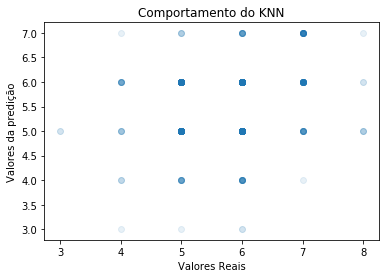

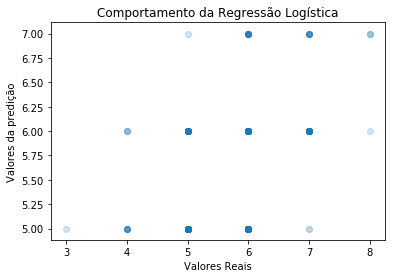

In [11]:
import matplotlib.pyplot as plt

plt.scatter(Y_test.values.T[0], knn_result, alpha=0.1)
plt.xlabel('Valores Reais')
plt.ylabel('Valores da predição')
plt.title('Comportamento do KNN')
plt.show()

plt.scatter(Y_test.values.T[0], lr_result, alpha=0.1)
plt.xlabel('Valores Reais')
plt.ylabel('Valores da predição')
plt.title('Comportamento da Regressão Logística')
plt.show()